Study of Hotel bookings related data is vital for any hospitality business as it gives insight into booking behaviour of customers as well as channels through which bookings are made.

This project involves the analysis of the provided data set pertaining to Hotel bookings for City and Resort Hotels.

Project activities have been categorised as under:
1.   Defining the problem statement i.e. Business Objective of the study.
2.   Collection and preparation of data by data cleaning , treating  outliers etc.
3.   Perform exploratory data analysis(EDA) through a deep study of relationship between different features, generate new variables based on need inline with related business objectives. Present the data in easily understandable form.
4.   Provide observations as well as recommendations based on the EDA.



# 1. Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


### Data Gathering
- this dataset is taken from [kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

### Dataset summarry
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

### Loading the dataset

In [11]:
df=pd.read_csv('hotel_bookings.csv')

 *What did you know about your dataset?*

The dataset given is a dataset from hotel industry, and we have to explore and analyze the data to discover important factors that govern the bookings.

The goal is to analyze the dataset by exploring data provided under various column headings.

The above dataset has 119390 rows and 32 columns. There are no null values in any columns except for 4 columns(children,country,agent,company). The dataset also have 31994 duplicate values

In [12]:
df_copy=df.copy()

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# 2. Explorig and Cleaning Data

### unclean data

1. Removing 'name', 'email', 'phone-number' and  'credit_card' columns: this contain personal information which is not need for analysis
2. reservation_status_date: is given as an object datatype --> convert it to datetime datatype
3. removing 'agent', 'company' columns: not needed
4. removing missing values from country and adults: very low missing values --> we can simply delete those

Checking for incorrect datatype

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

checking for null values

In [15]:
df.isnull().sum()
#lot of missing values in agent and company
#those columns are not needed therefor we will delete those

#country and adults: very low missing values --> we can simply delete those

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Null Value Visualization by Heatmap

Text(0.5, 1.0, 'Places of missing values')

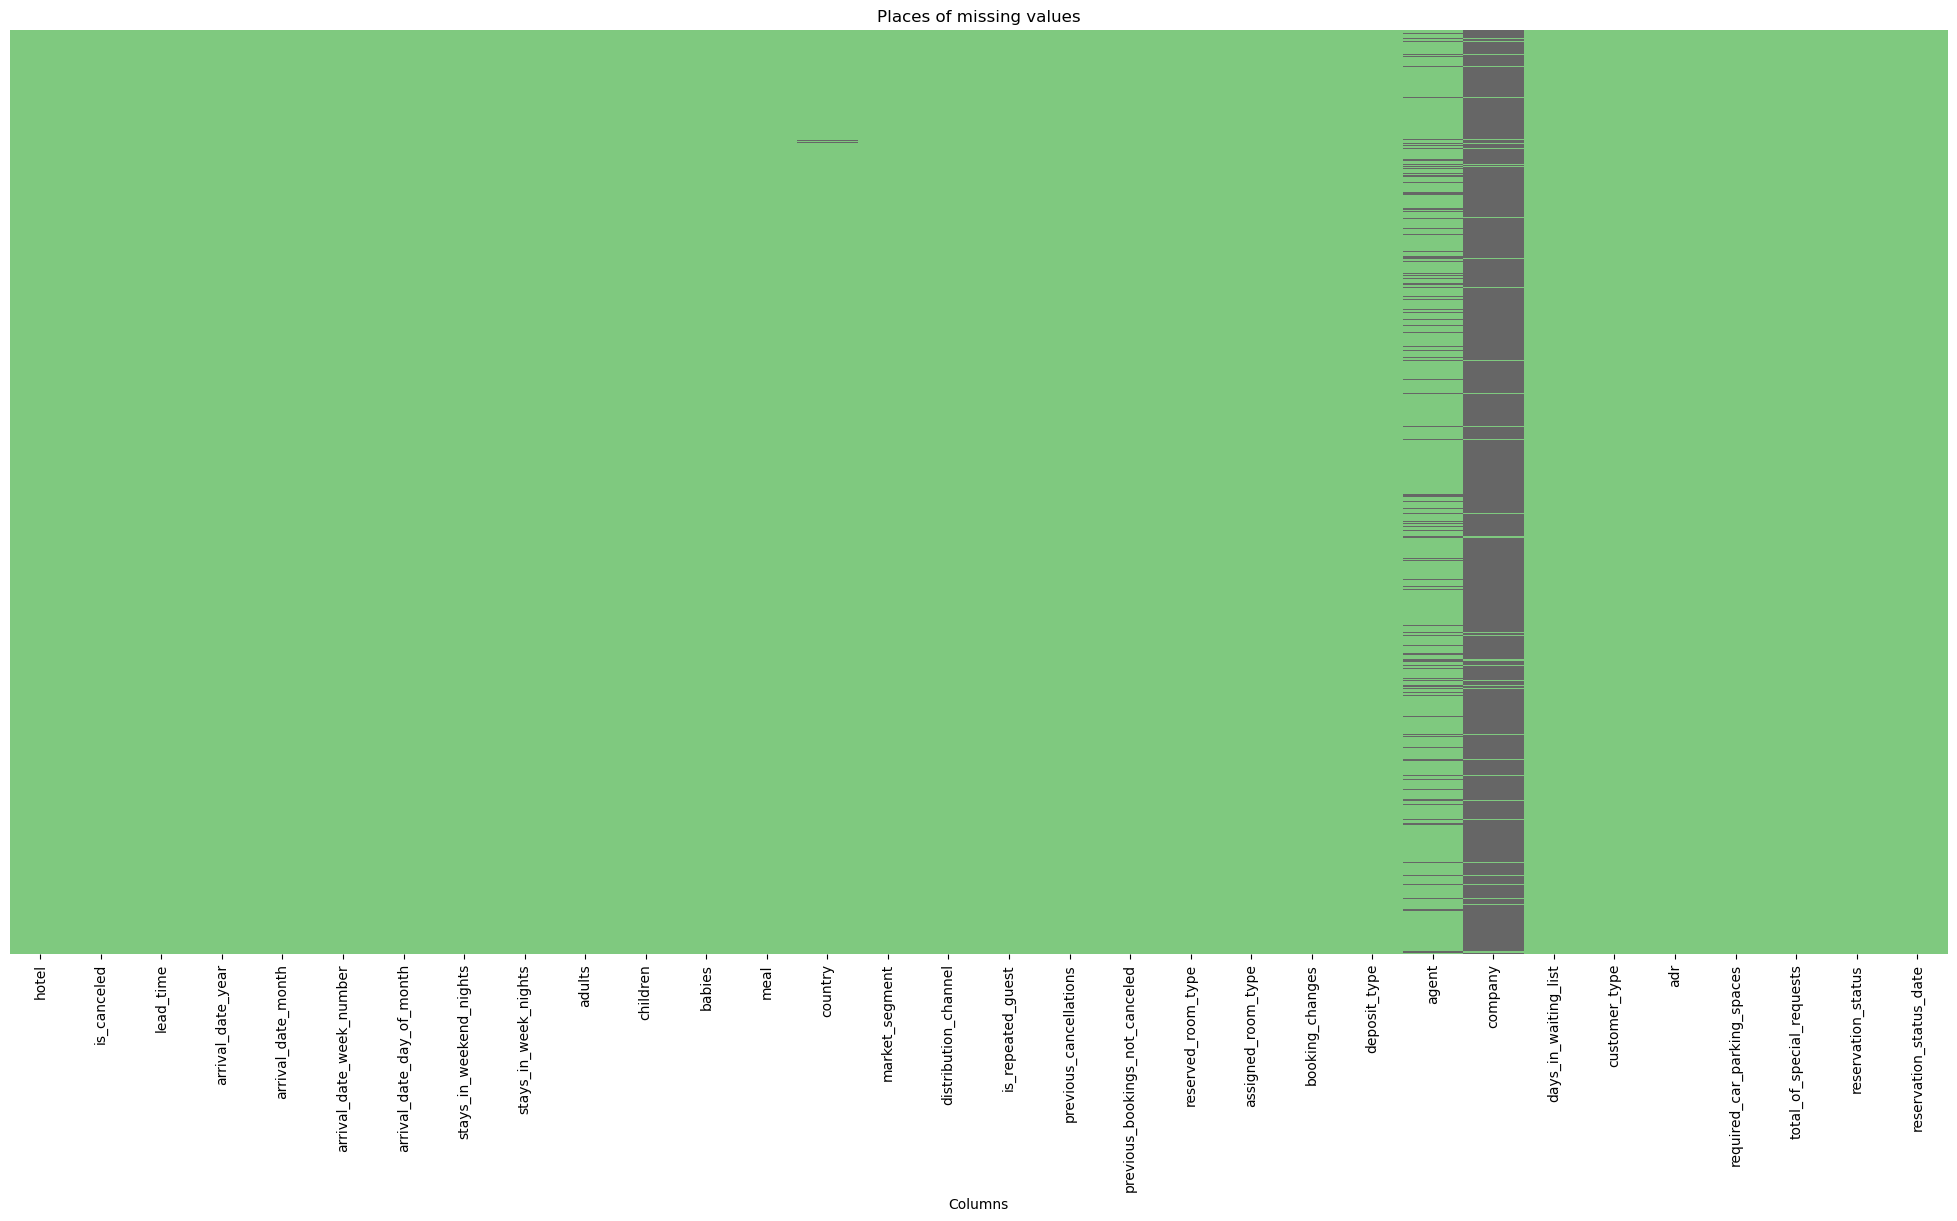

In [16]:

plt.figure(figsize=(25,12))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Accent')
plt.xlabel('Columns')
plt.title('Places of missing values')

### replacing null value with 0.0

In [17]:
null_columns= ['agent','children','company']
for col in null_columns:
  df[col].fillna(0.0,inplace=True)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [20]:
#Repacing NA value in country by others
df['country'].fillna('others',inplace=True)

In [21]:
#look if there no guest
df[df['adults']+df['children']+df['babies'] ==0].shape


(180, 32)

180 rows having no guest so drop that rows

In [22]:
#drop rows where is no guest
df=df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [23]:
#look for changed shape of df
df.shape

(119210, 32)

### Look for outliars

<Axes: xlabel='adr'>

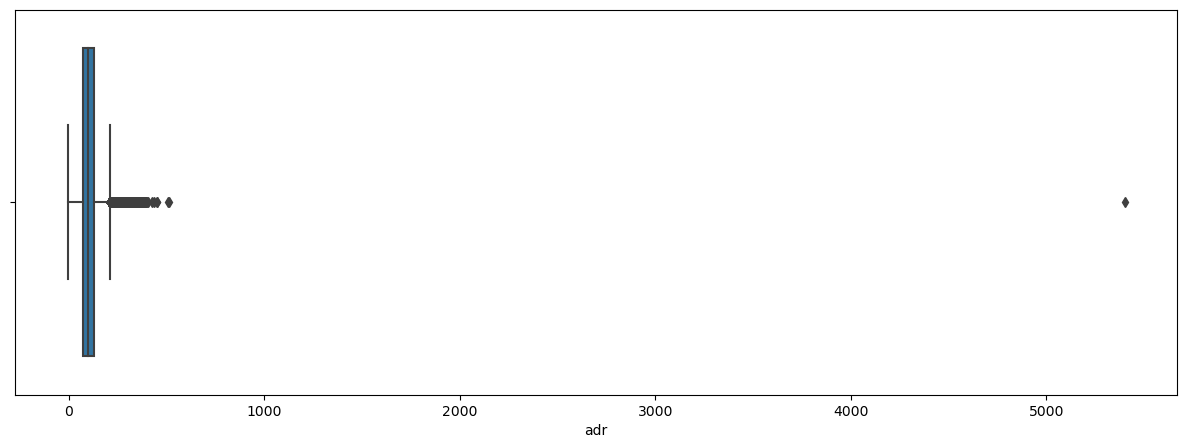

In [24]:
#box plot which shows outliers & quartile
plt.rcParams['figure.figsize']=(15,5)
sns.boxplot(x=df['adr'])

adr column having negative value in summary, so its having outlier

In [25]:
# summary of adr column to find outliers
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [26]:
Q1 = 69.29
Q2 = 94.25
Q3 = 126
IQR = Q3 - Q1

In [27]:
lower_outlier_value = Q1 - 1.5*IQR    #Bellow this value: Lower Side Outliers
upper_outlier_value = Q3 + 1.5*IQR    #Above this value: Upper Side Outliers

In [28]:
df[df['adr']< lower_outlier_value].shape, df[df['adr']> upper_outlier_value].shape

((0, 32), (3793, 32))

In [29]:
#No outliers for below (Q1-1.5*IQR) droping outliers which are above (Q3+1.5*IQR)
df.drop(df[df['adr'] > upper_outlier_value].index, inplace=True)

In [30]:
#shape of data after droping outliers
df.shape

(115417, 32)

<Axes: xlabel='adr'>

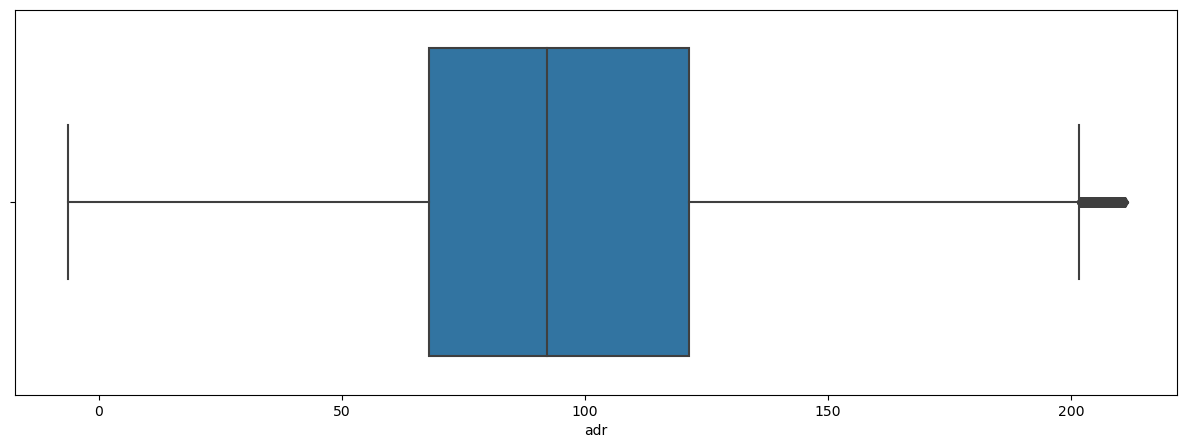

In [31]:
#compare outliers with previous graph
plt.rcParams['figure.figsize']=(15,5)
sns.boxplot(x=df['adr'])

In [32]:
df['adr'].describe()

count    115417.000000
mean         97.171670
std          40.482701
min          -6.380000
25%          68.000000
50%          92.210000
75%         121.500000
max         211.030000
Name: adr, dtype: float64

In [33]:
#we need to replace a negative or very small values from adr column

In [34]:
#no of negative or zero values in adr
df[df['adr']<=0].shape

(1811, 32)

For low adr values conside half of 25% quartile value, which come to be 34

In [35]:
#replace adr values which below 34
df.loc[df.adr <= 34, 'adr'] = df['adr'].mean()

In [36]:
#check for changes
df['adr'].describe()

count    115417.000000
mean        100.043482
std          37.210658
min          34.020000
25%          72.420000
50%          95.700000
75%         121.500000
max         211.030000
Name: adr, dtype: float64

In [37]:
#covert float type to int
df = df.astype({"children":'int', "agent":'int', "company":'int' }) 

convert reservation_status_date to datetime datatype

In [38]:
#check: dtype is object 
df['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119384    2017-09-06
119385    2017-09-06
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 115417, dtype: object

In [39]:
# converting object type to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [40]:
#test: reservation_status_date is converted to datetime
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119384   2017-09-06
119385   2017-09-06
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 115417, dtype: datetime64[ns]

checking unique values of categroical columns

In [45]:
for col in df.describe(include='object').columns:
  print(col)
 
  print(df[col].unique())
  print('-'*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'others' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'IND' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'LBN' 'PHL'

### Data description

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

# 3. Exploratory Data Analysis (EDA )

### 1. From where most guest are coming?

In [47]:
guest_according_country = df[df['is_canceled']==0]['country'].value_counts().reset_index()
guest_according_country.columns = ['country','no of guests']

guest_according_country

,country,no of guests
0,PRT,20200
1,GBR,9505
2,FRA,8272
3,DEU,6003
4,ESP,5960
...,...,...
158,MLI,1
159,BHS,1
160,MAC,1
161,BFA,1


Text(0.5, 1.0, 'Guests Accourding to country')

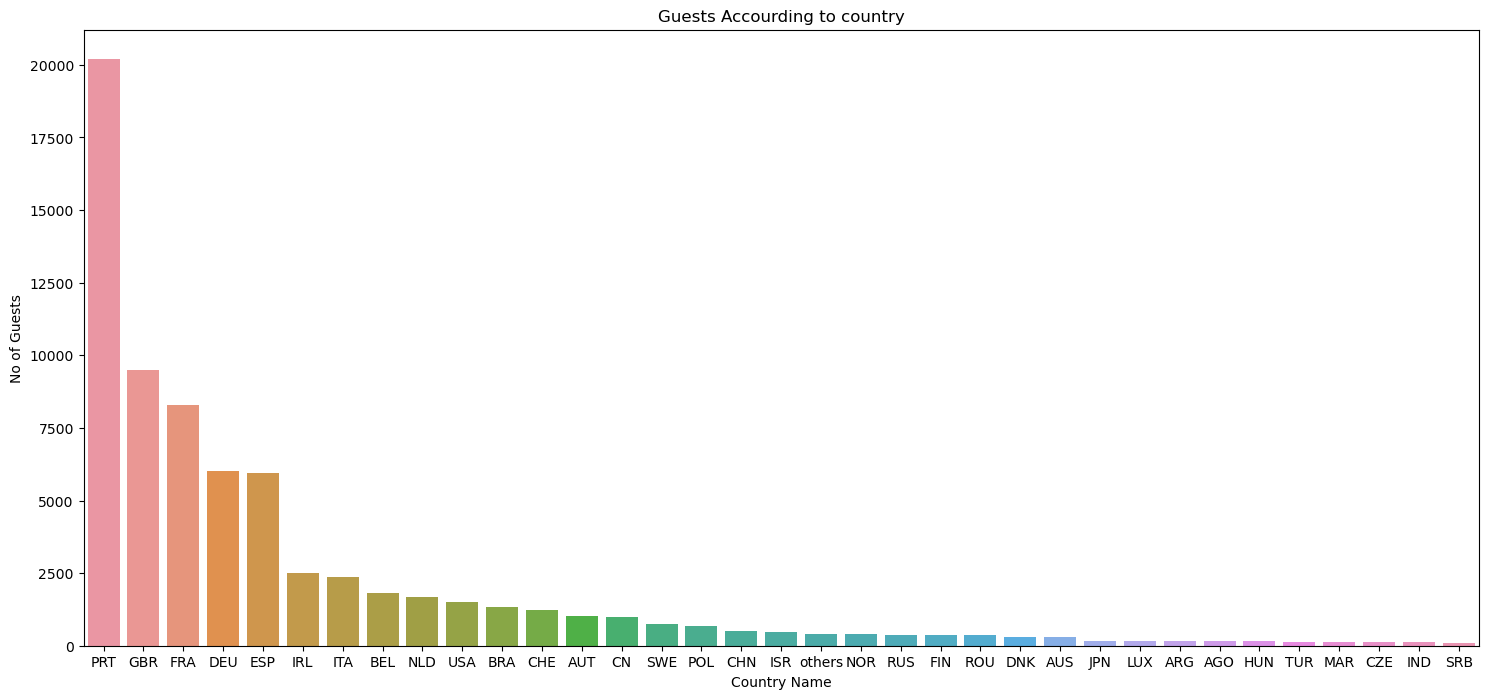

In [48]:
#Visualizaing the graph

# Countries according to Ten largest values of guest
guest_according_country=guest_according_country.nlargest(35, ['no of guests'])

plt.figure(figsize=(18,8))
sns.barplot(x=guest_according_country['country'],y=guest_according_country['no of guests'],order=guest_according_country['country'])
plt.xlabel('Country Name')
plt.ylabel('No of Guests')
plt.title("Guests Accourding to country")


**Conclusion**: Contries from where coming most of guest are PRT, GBR & FRA.

Advice 
- increase facilites in hotels situated in Protugle, lower the Prices, give promotional discounts, run campines, increase advertisements to decrease the cancellatios

### 2. What percentage of bookings are canceled?

In [49]:
cancelled_percentage=df['is_canceled'].value_counts(normalize=True)*100
cancelled_percentage

is_canceled
0    62.977724
1    37.022276
Name: proportion, dtype: float64

In [50]:
#replace 0 by Not canceled & 1 by canceled
df.is_canceled = df.is_canceled.replace(0,'Not_Canceled').replace(1, 'Canceled')

Text(0.5, 1.0, 'Bookings Cancelation')

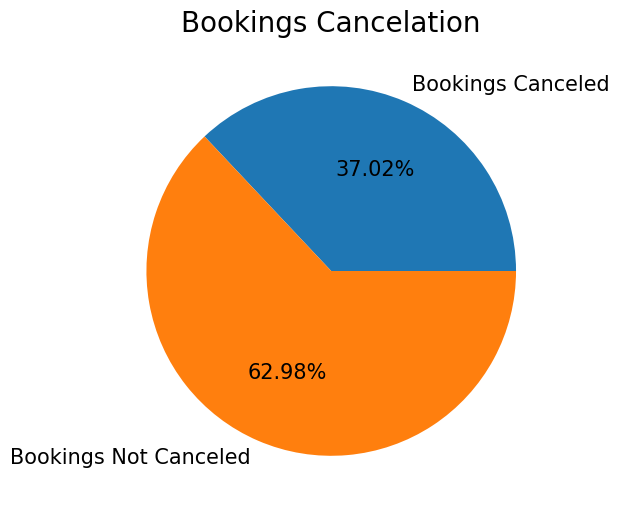

In [51]:
df.groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Canceled", "Bookings Not Canceled"], fontsize=15, autopct='%.2f%%',  figsize=(6, 6))
plt.ylabel('' , fontsize=20)
plt.title('Bookings Cancelation', fontsize=20)

**Conclusion:**
1. 37.02% of booking got cancelled
2. 62.98% of booking not camcelled. 

### 3. Which are the most busy months?

In [55]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
bookings_by_months_df=bookings_by_months_df.sort_values('Counts')
bookings_by_months_df

,arrival_date_month,Counts
4,January,5917
2,December,6655
9,November,6758
3,February,8032
7,March,9730
11,September,10348
6,June,10686
0,April,10926
10,October,11087
8,May,11560


Text(0, 0.5, 'Number of bookings')

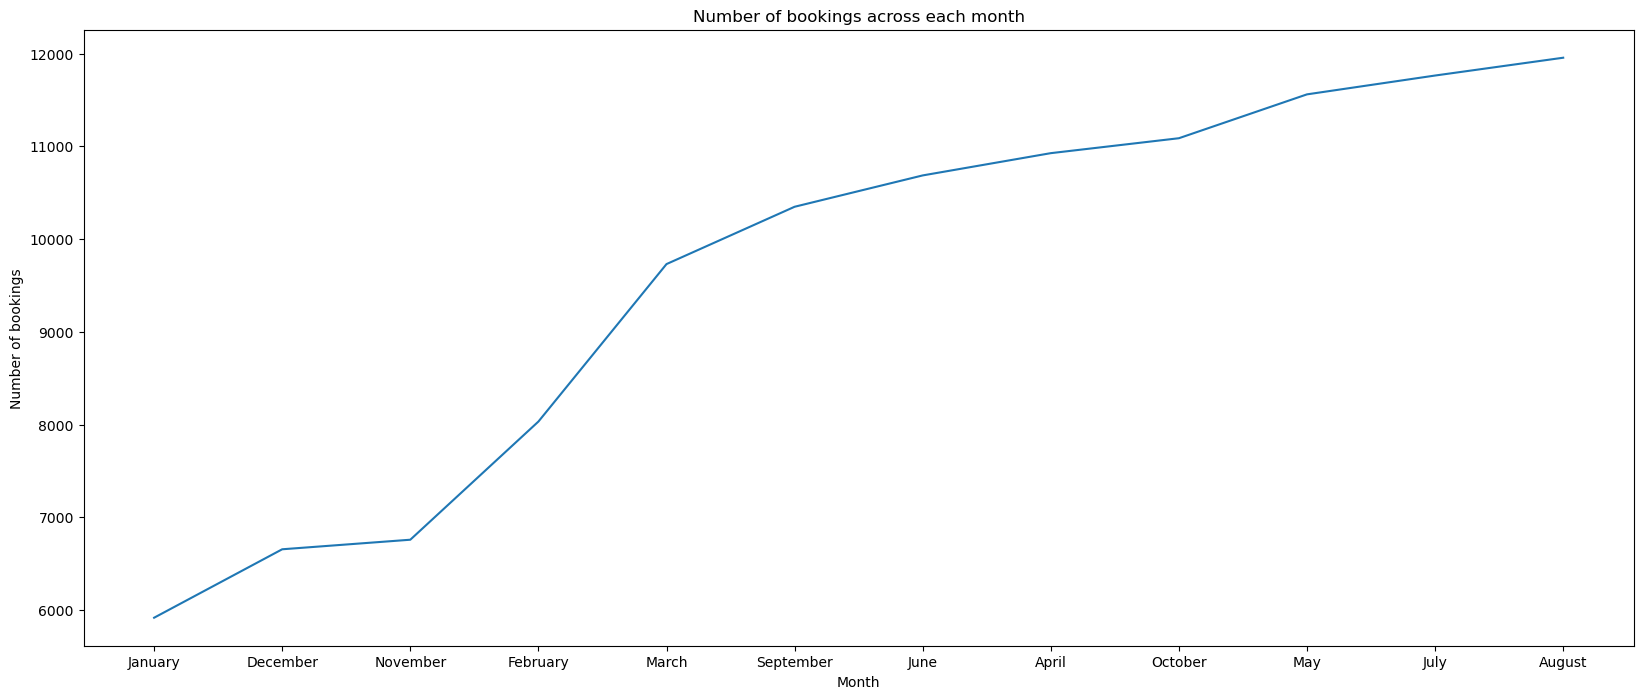

In [56]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

**Conclusion:**
1. From above plot graph August & July months in a year having highest booking.
2. Very less no of bookings are done in December & January month.

### 4. Which Year having highest booking?

Text(0.5, 1.0, 'Year Wise bookings')

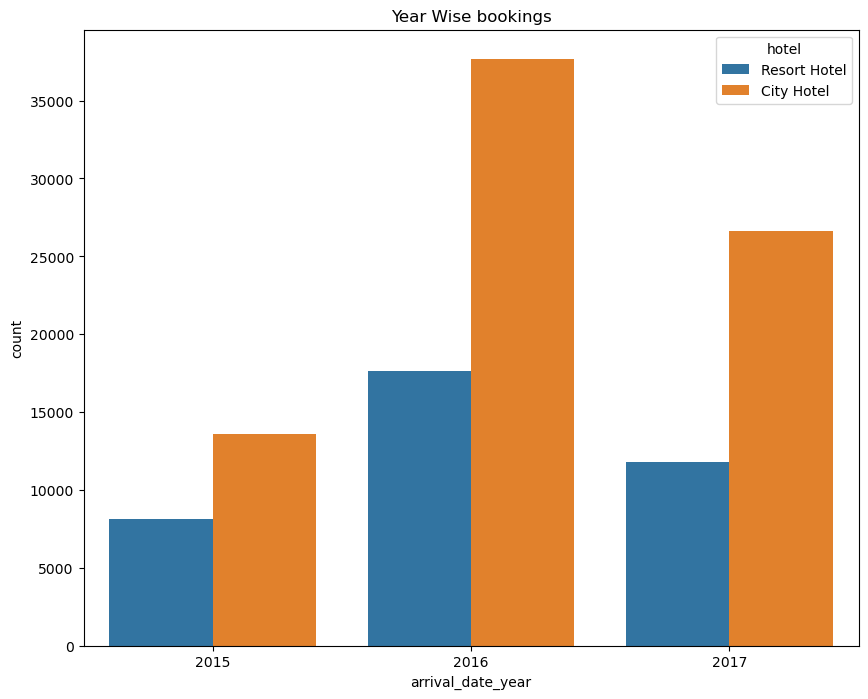

In [60]:
# set plot size
plt.figure(figsize=(10,8))

#  plot with countplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings")

Conclusion:
1. The year 2016 had a high number of bookings for both City Hotels and Resort  Hotels.
2. Hotel bookings for cities are almost always higher than those for resorts.

### 5. Which agent made most booking?



In [61]:
#Highest booking made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().sort_values(by='count',ascending=False)


# Droping agent NAN value.it having no booking
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

#Top ten agent having highest booking
Top_ten_agent_booking =  highest_bookings[:10]

Top_ten_agent_booking

,agent,count
9,9,31189
173,240,12424
1,1,7180
7,7,3445
14,14,3431
6,6,3289
182,250,2443
27,28,1652
174,241,1650
8,8,1433


Text(0.5, 1.0, 'Most Bookings Made by the agent')

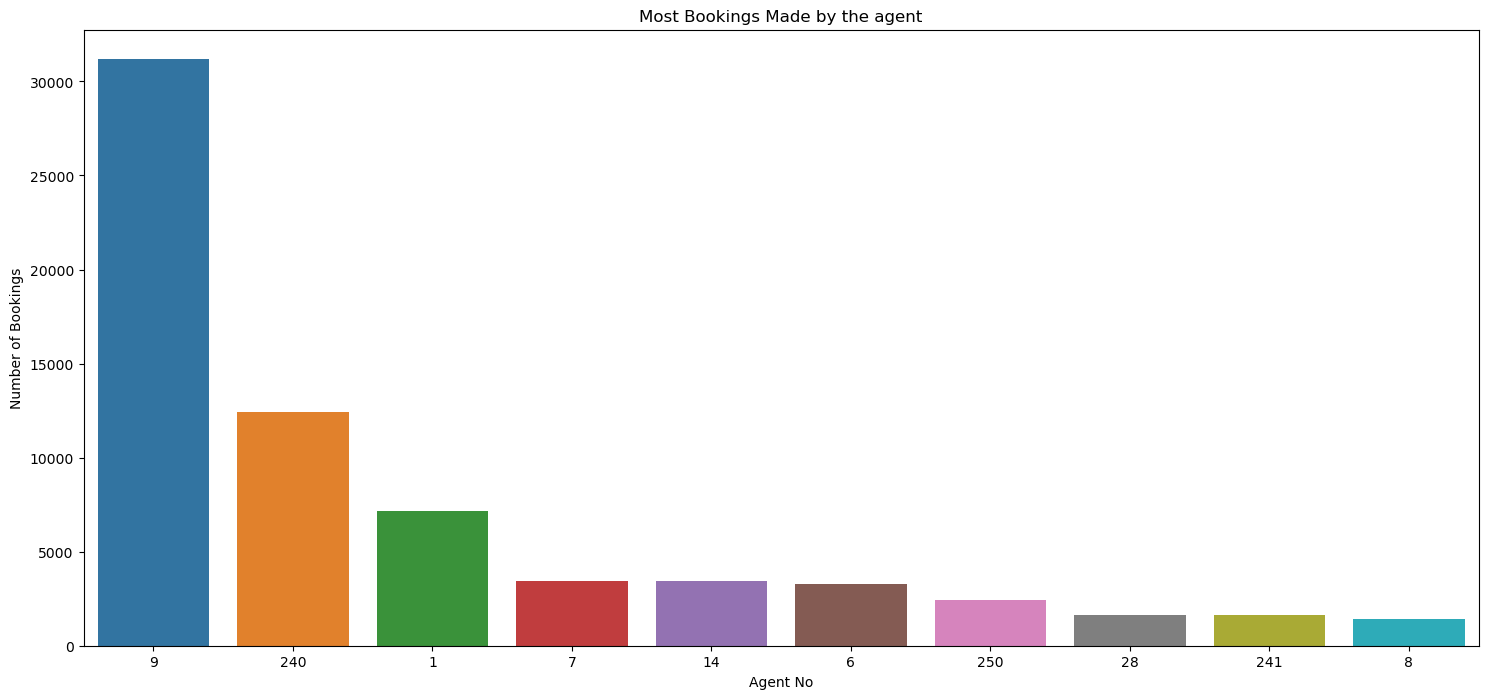

In [62]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=Top_ten_agent_booking['agent'],y=Top_ten_agent_booking['count'],order=Top_ten_agent_booking['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

**Conclusion:**
1. 9 No. agent make highest no of booking as compare to all other agents.
2. Agent no 9,240 & 1 make highest no of booking.


### 6. Which type of food prefered by guest?

Text(0, 0.5, '')

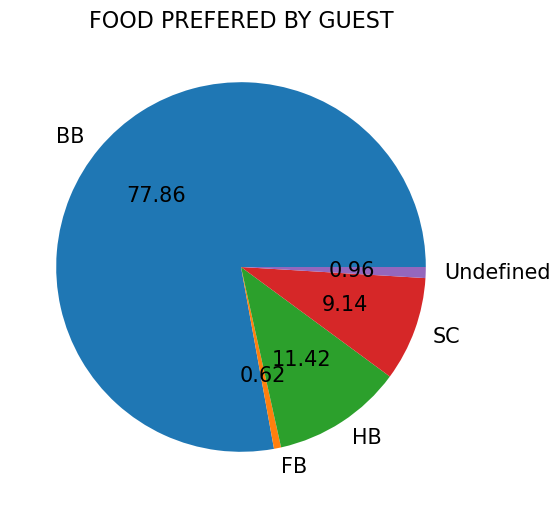

In [63]:
df.groupby('meal').size().plot(kind='pie', labels=["BB", "FB", "HB", "SC", "Undefined"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.title('FOOD PREFERED BY GUEST', fontsize=16)
plt.ylabel('')

BB: Bed & Breakfast

HB: Half Board (Breakfast and Dinner normally)

FB: Full Board (Beakfast, Lunch and Dinner)

SC: Self Catering

**Conclusion:** BB (Bed & Breakfast) type meal were mostly prefered.

### 7. Most prefered room type by customers?

Text(0.5, 1.0, 'Most preferred Room type')

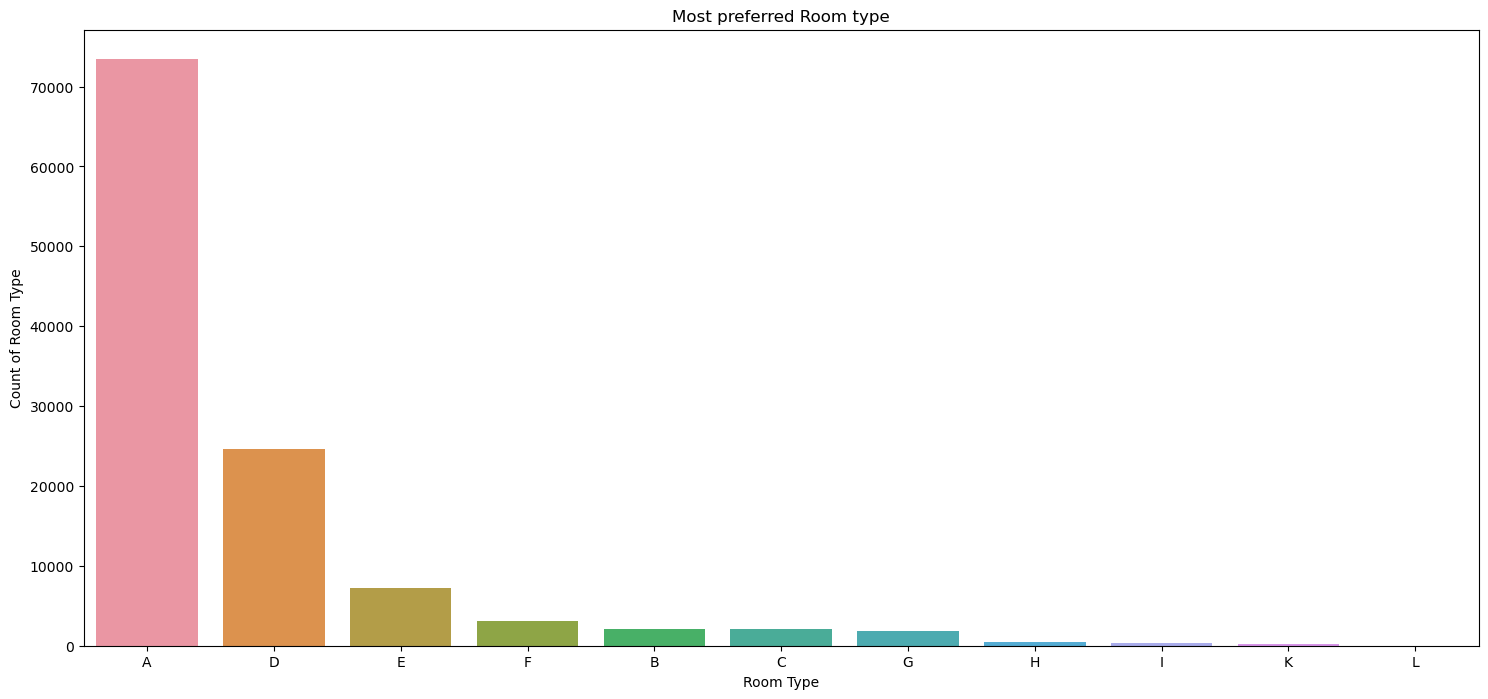

In [65]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

**Conclusion:**

1.Most prefered room type is A

2.Room type of A,B,C mostly prefered by guest

### 8. Which type of hotel having longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

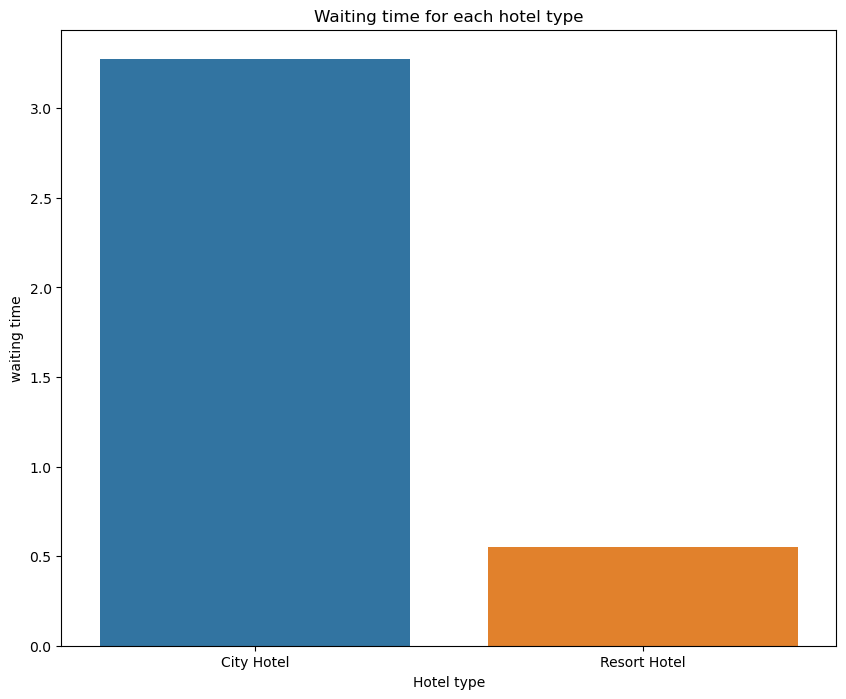

In [66]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

**Conclusion**
1.  City hotel having longer lead time than Resort hotel.

### 9. Comparison of no of adults VS Booking

Text(0.5, 1.0, 'No. of Adults Vs. Bookings')

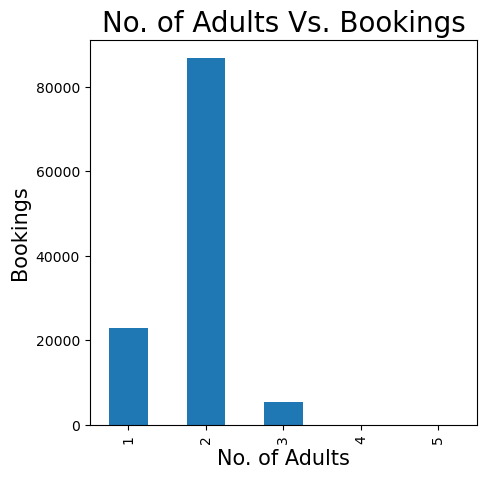

In [67]:
df['adults'].value_counts().sort_index()[1:6].plot(kind='bar', figsize=(5,5))
plt.xlabel('No. of Adults' , fontsize=15)
plt.ylabel('Bookings' , fontsize=15)
plt.title('No. of Adults Vs. Bookings', fontsize=20)

**Conclusion:**
1. Two nos of adults having major bookings.


### 10. When the best time of year to book a hotel room is? 


Text(0, 0.5, 'Average adr')

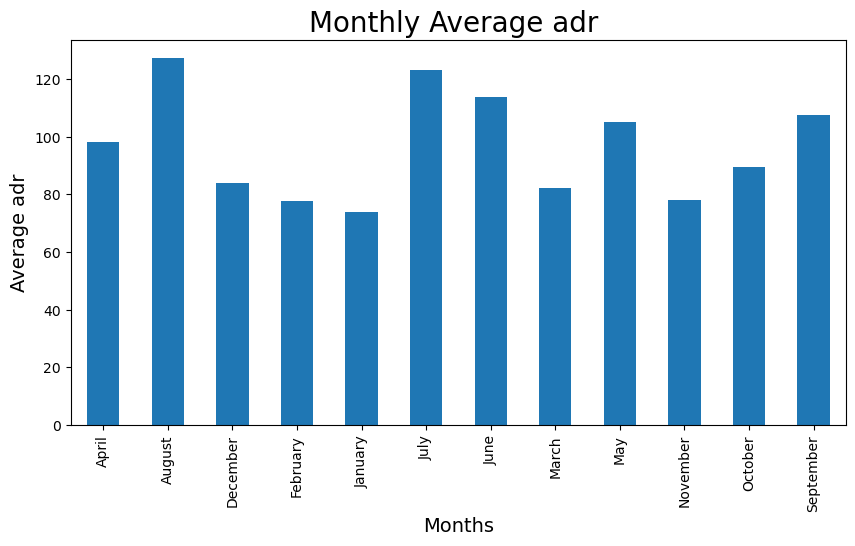

In [68]:
non_canceled_booking=df[(df['is_canceled'] == 'Not_Canceled')]
non_canceled_booking.groupby(non_canceled_booking['arrival_date_month'])['adr'].mean().plot(kind='bar', figsize=(10,5))
plt.title('Monthly Average adr ', fontsize=20)
plt.xlabel('Months' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)


**Conclusion:**

After compare Adr with no of bookings of each Month.
1. Average daily rate was highest in month of August.
2. Average daily rate was lowest in month of January.
3. So best time of year to book a hotel was January.

### 11. Which type of hotel have highest ADR?

<Axes: title={'center': 'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

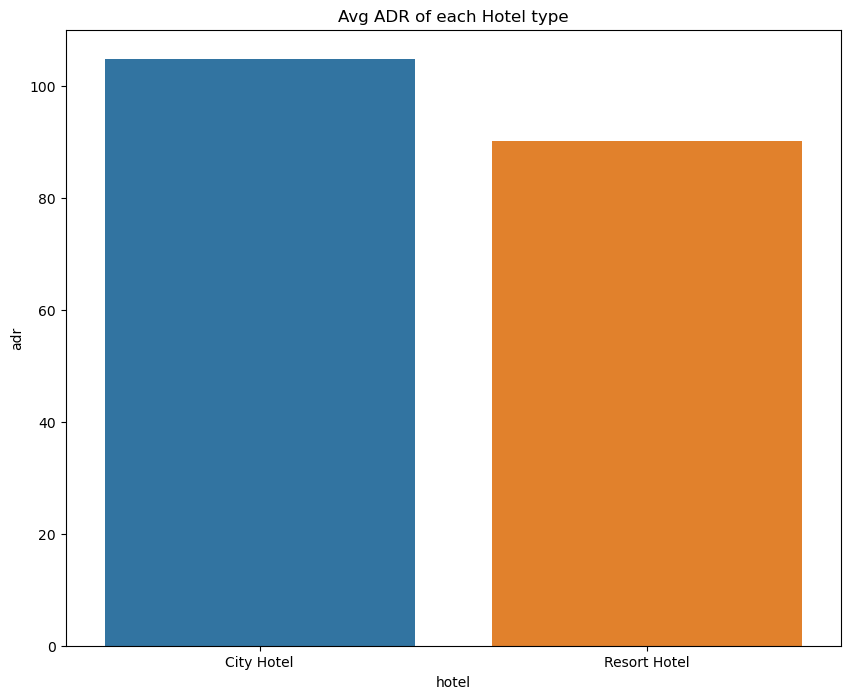

In [69]:
# group by hotel
grup_by_hotel=df.groupby('hotel')


#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

**Conclusion:**

City hotel has the highest ADR.means city hotels are generating more revenues than the resort hotels. 

### Which hotel has most waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

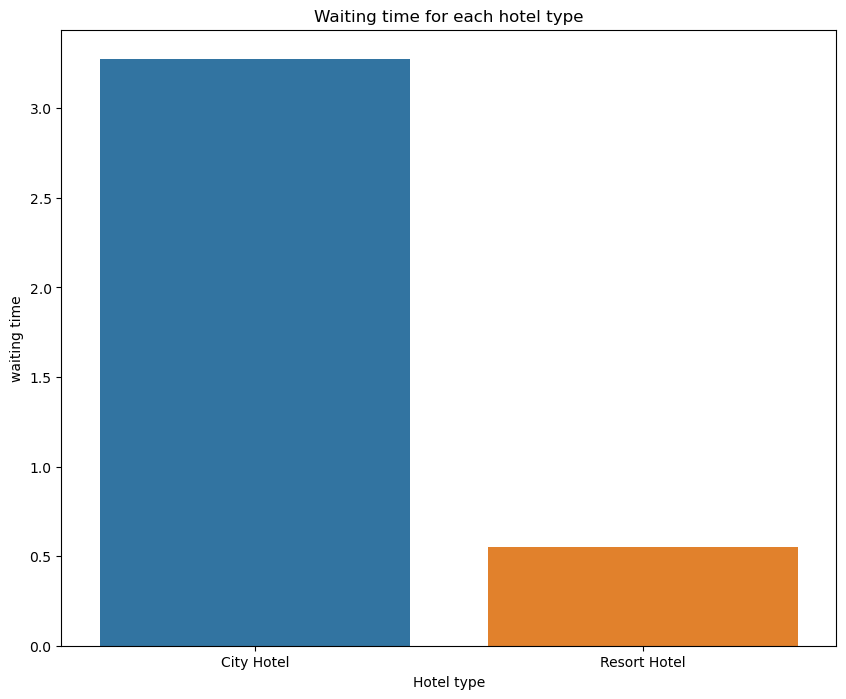

In [70]:
#groupping by hoetl and days in waiting list
waiting_time_df=df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()


#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

**Conclusion**
1. So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

### 13. What is relationship of ADR with total no of people?

In [72]:
#craete df for total people
df['total_people'] = df['adults'] + df['babies'] + df['children']  

Text(0.5, 1.0, 'ADR v/s Total Number of people')

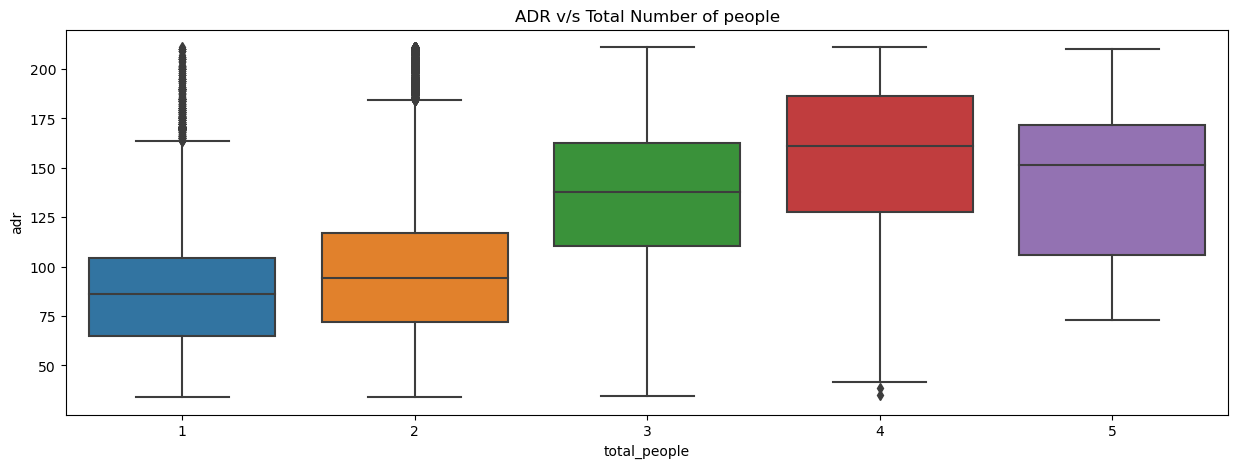

In [73]:
plt.figure(figsize=(15,5))
df1=df[df['total_people'] < 6]

sns.boxplot(x=df1['total_people'],y=df1['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

**Conclusion:**

1. As the  total number of people increases adr also increases.
2. Thus adr and total people are directly proportional to each other.

### 14. Which distribution channel has the higest cancellation rate?

In [74]:
canceled_df=df[df['is_canceled']=='Not_Canceled']

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})

canceled_df

,distribution_channel,hotel,Counts
0,Corporate,City Hotel,2607
1,Corporate,Resort Hotel,2573
2,Direct,City Hotel,5304
3,Direct,Resort Hotel,5997
4,GDS,City Hotel,156
5,TA/TO,City Hotel,37219
6,TA/TO,Resort Hotel,18830
7,Undefined,Resort Hotel,1


Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

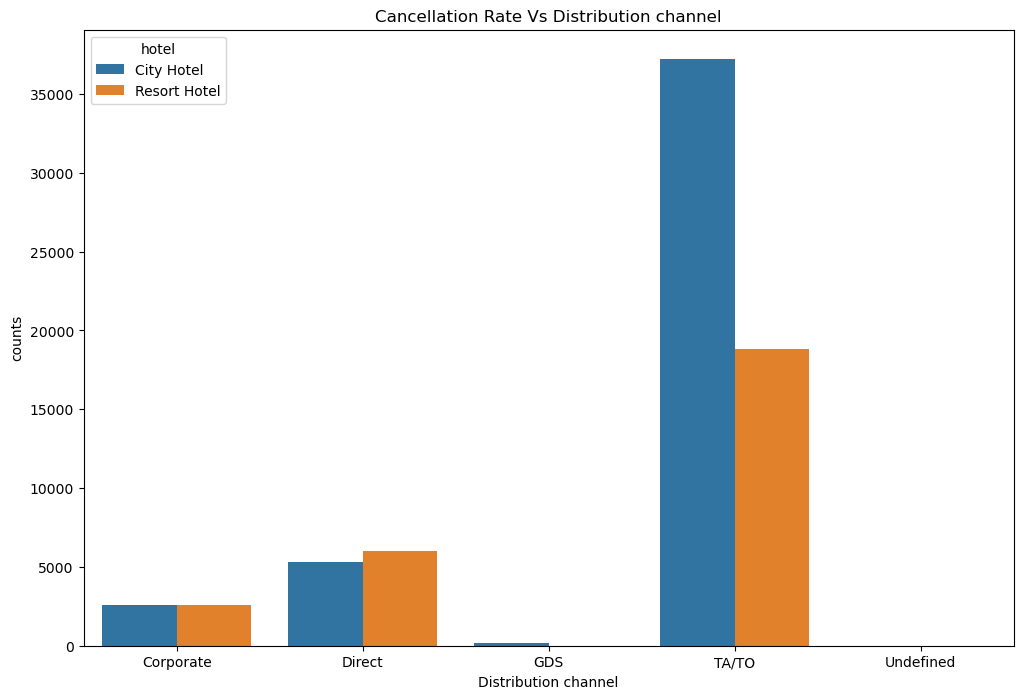

In [75]:
#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

**Conclusion**

* In "TA/TO", City hotels has the high cancellation rate compared to resort 
hotels.
* In "direct" both the hotels has almost same cancellation rate.



### 15.The optimal length of stay in order to get the best daily rate? 

In [76]:
# total stay at hotel will be sum of number of night stay in week and weekend
non_canceled_booking['length_of_stay'] =non_canceled_booking['stays_in_weekend_nights'] + non_canceled_booking['stays_in_week_nights']

Text(0, 0.5, 'Average adr')

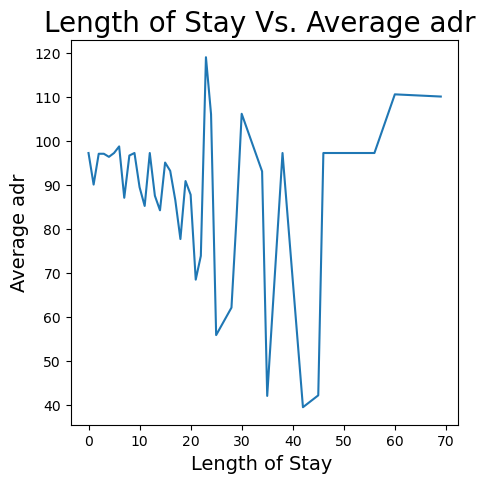

In [77]:
# total stay at hotel will be sum of number of night stay in week and weekend
non_canceled_booking['length_of_stay'] =non_canceled_booking['stays_in_weekend_nights'] + non_canceled_booking['stays_in_week_nights']

non_canceled_booking.groupby(non_canceled_booking['length_of_stay'])['adr'].median().plot(kind='line', figsize=(5,5))
plt.title('Length of Stay Vs. Average adr ', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

**Conclusion:**

1 Lowest value of adr is for 42 nights length of stay.

2 So to get beast daily rate one must stay for 42 nights.

### 16. Total Bookings Vs. Length of Stay

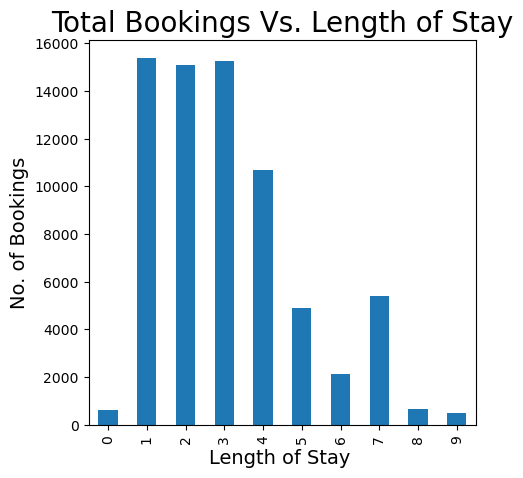

In [78]:
# total stay at hotel will be sum of number of night stay in week and weekend
non_canceled_booking['length_of_stay'] =non_canceled_booking['stays_in_weekend_nights'] + non_canceled_booking['stays_in_week_nights']

#lets compare lenth of stay with total no of bookings
non_canceled_booking.groupby(non_canceled_booking['length_of_stay'])['hotel'].size()[:10].plot(kind='bar', figsize=(5,5))
plt.title('Total Bookings Vs. Length of Stay', fontsize=20)
plt.xlabel('Length of Stay ' , fontsize=14)
plt.ylabel('No. of Bookings' , fontsize=14)
plt.show()




**Conclusion:**
1. Highest booking for 1,2 & 3 No of Nights.

### 17. Length of Stay: City Hotel vs. Resort Hotel

Text(0, 0.5, 'No. of Bookings')

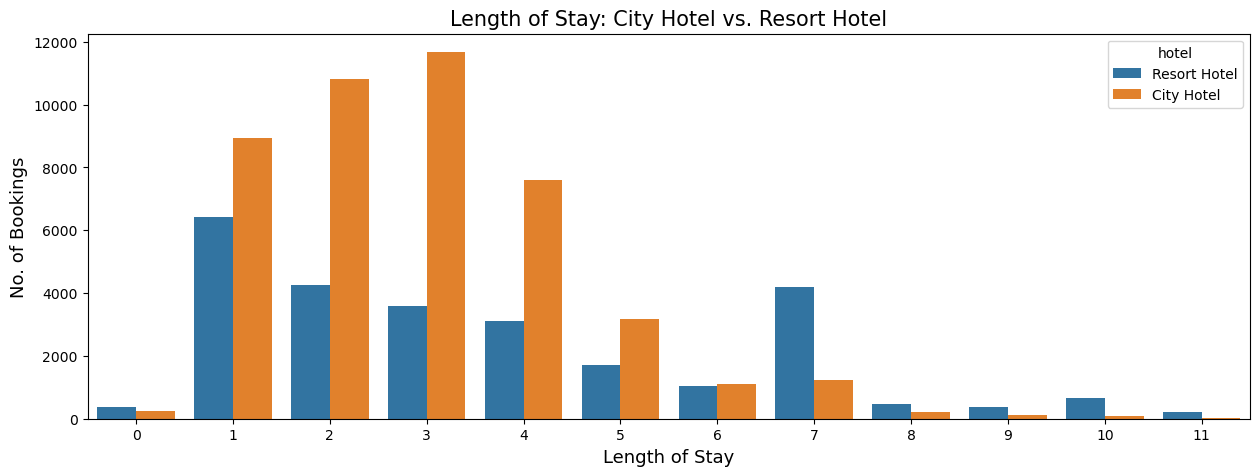

In [79]:
#length of stay City hotel Vs Resort Hotel
sns.countplot(data = non_canceled_booking, x = 'length_of_stay', hue = 'hotel', order=[0,1,2,3,4,5,6,7,8,9,10,11])
plt.title('Length of Stay: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Length of Stay', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

Conclusion:
1. Booking in Resort Hotel deacrease with increasing length of stay.
2. Bookings at the City Hotel rise up to a three-night stay as the length of stay increases. after a dramatic decline.

### 19. No. of Adults Vs. Average Total of Special Requests 

Text(0, 0.5, 'Average Total of Special Requests')

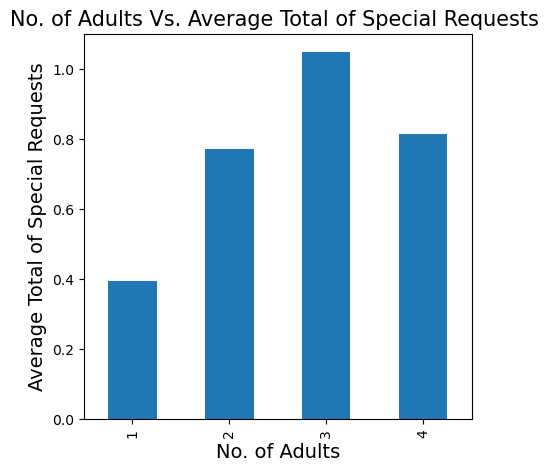

In [85]:
# Check relation of total special request with no of adults
non_canceled_booking.groupby(non_canceled_booking['adults'])['total_of_special_requests'].mean()[1:].plot(kind='bar', figsize=(5,5))
plt.title('No. of Adults Vs. Average Total of Special Requests ', fontsize=15)
plt.xlabel('No. of Adults' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

**Conclusion:**
1. 3 No of adults having high no of special request.
2. Special request increasing with increase no of adults.


### 20. Arrival Year Vs. Average Total of Special Requests

Text(0, 0.5, 'Average Total of Special Requests')

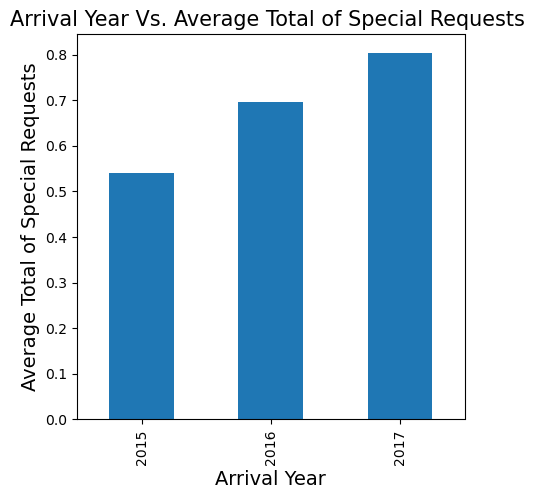

In [86]:
#Check relation between arrival year & total special request
non_canceled_booking.groupby(non_canceled_booking['arrival_date_year'])['total_of_special_requests'].mean().plot(kind='bar', figsize=(5,5))
plt.title('Arrival Year Vs. Average Total of Special Requests ', fontsize=15)
plt.xlabel('Arrival Year' , fontsize=14)
plt.ylabel('Average Total of Special Requests' , fontsize=14)

Conclusion:
1. Special request are increasing with increasing year.

### 21.Total of Special RequestsVs. Average adr 

Text(0, 0.5, 'Average adr')

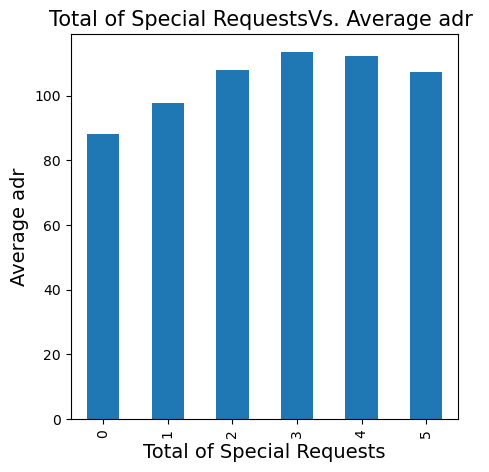

In [87]:
#Relation between total special request & average adr
non_canceled_booking.groupby(non_canceled_booking['total_of_special_requests'])['adr'].median().plot(kind='bar', figsize=(5,5))
plt.title('Total of Special RequestsVs. Average adr ', fontsize=15)
plt.xlabel('Total of Special Requests' , fontsize=14)
plt.ylabel('Average adr' , fontsize=14)

**Conclusion:**
1. With increasing average adr increase in special request.

### 22. Cancelation rate hotel wise

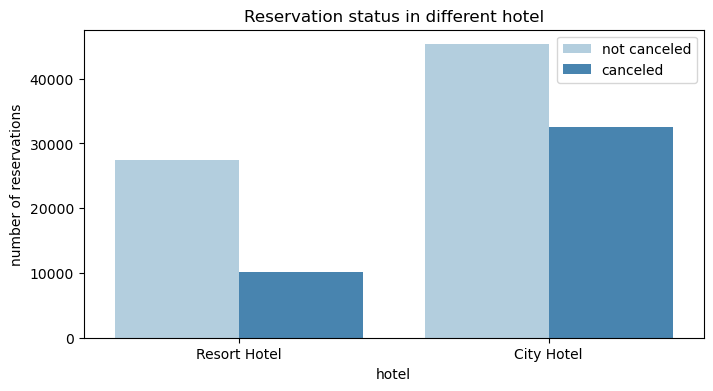

In [88]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
plt.title('Reservation status in different hotel')
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

**Conclusion:**
Resort hotel has large number of cancelation compare to Resort hotel.

### Assumption
- city hotel has more booking because it is cheaper than resort hotel

- price or maintanence may be cause of high cancelation rates

### 23. Percentage of reserveation cancelled

In [89]:
resort_hotel=df.query('hotel=="Resort Hotel"')
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.729837
1    0.270163
Name: proportion, dtype: float64

In [90]:
city_hotel=df.query('hotel=="City Hotel"')
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.581537
1    0.418463
Name: proportion, dtype: float64

**Conclusion:**

Around 42% of reservations are getting canceled in City Hotel which is a very high number

### 24. Does price affect cancelation

- comparing mean of average daily rate of both hotels

In [91]:
resort_hotel_mean=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_mean=city_hotel.groupby('reservation_status_date')[['adr']].mean()

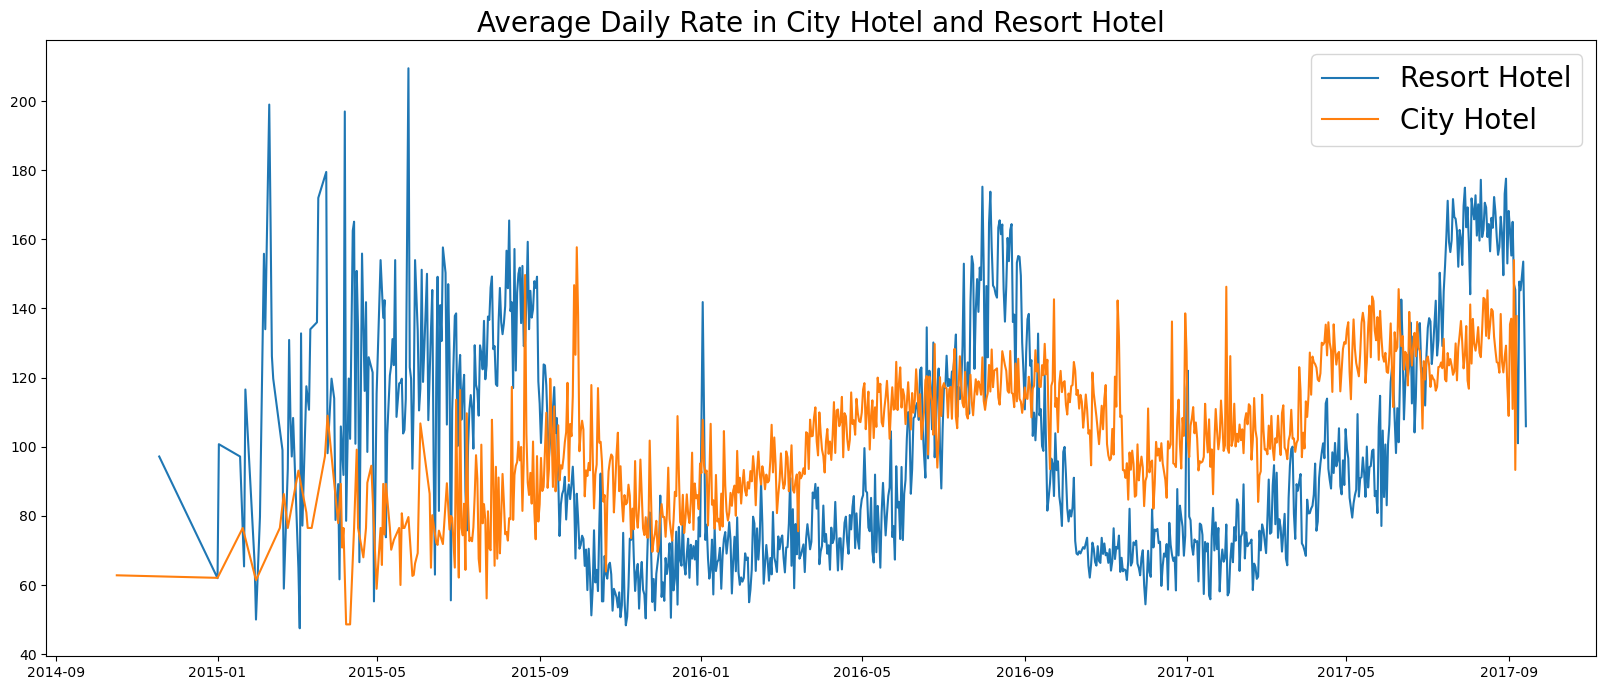

In [92]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City Hotel and Resort Hotel',fontdict={'fontsize': 20})
plt.plot(resort_hotel_mean.index, resort_hotel_mean['adr'], label='Resort Hotel')
plt.plot(city_hotel_mean.index, city_hotel_mean['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

**Conclusion:**

Spikes in the graph represets the high prices during the weekend or holidays. This graph proves the hypothesis that city hotels price are higher than Resort hotel price for most days. while there are some times were resort hotel price are escaleted
 



### 25. Week wise reservatio cancellations

1.   List item
2.   List item



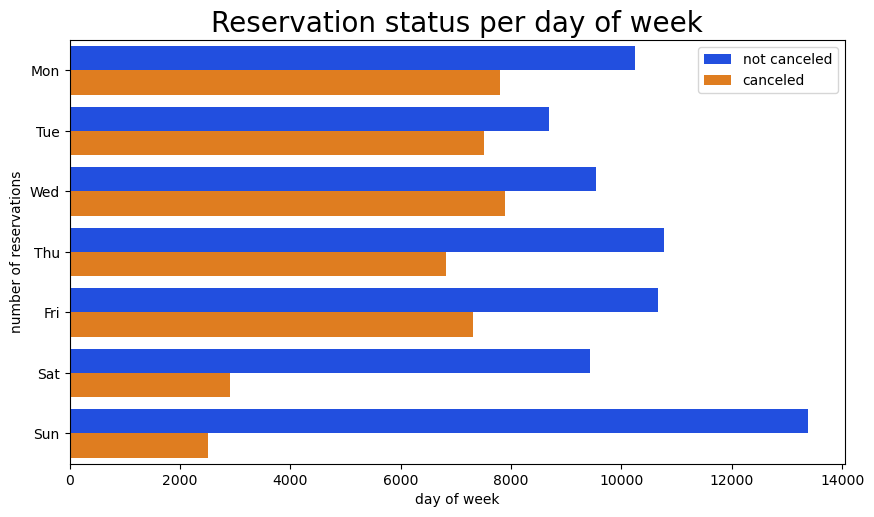

In [93]:
df['dayofweek']=df['reservation_status_date'].dt.dayofweek
plt.figure(figsize=(10,5.5))
ax1=sns.countplot(y='dayofweek',hue='is_canceled',data=df, palette='bright')

plt.title('Reservation status per day of week',fontdict={'fontsize': 20})
plt.xlabel('day of week')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
dayofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax1.set_yticklabels(dayofweek)
plt.show()

As shown in above bar graph cancelation were highest on weekdays and very minimal on weekends.

around 47% cancelation is done by customers who book online

### 27. Does canceled bookings have high adr?

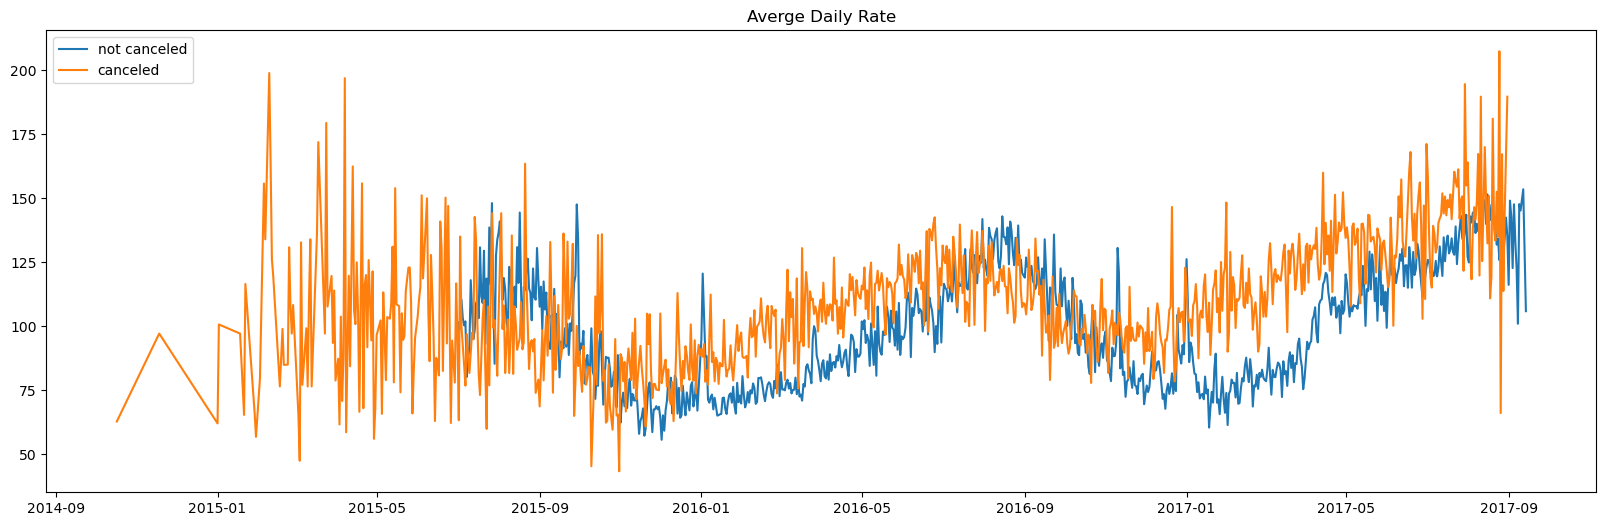

In [102]:
cancelation_data=df.query('is_canceled==1')
cancelation_df_adr=cancelation_data.groupby('reservation_status_date')[['adr']].mean()
cancelation_df_adr.reset_index(inplace=True)
cancelation_df_adr.sort_values('reservation_status_date',inplace=True)

non_canceled_data=df.query('is_canceled==0')
non_canceled_df_adr=non_canceled_data.groupby('reservation_status_date')[['adr']].mean()
non_canceled_df_adr.reset_index(inplace=True)
non_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Averge Daily Rate')
plt.plot(non_canceled_df_adr['reservation_status_date'],non_canceled_df_adr['adr'],label='not canceled')
plt.plot(cancelation_df_adr['reservation_status_date'],cancelation_df_adr['adr'],label='canceled')
plt.legend()
plt.show()

## EDA Conclusions

1) Most of the guests are local i.e. from Portugal. Among overseas visitors, European neighbours like United Kingdom, France, Spain, Germany, Italy had maximum footfall. Least number of visitors came from Countries like Zambia, Madagascar, Seychelles, Faroe Islands etc. Hence there is scope to increase footfall from these countries from where number of customers were less.

2) Barring 2015, almost 2/3rd of the bookings were for City Hotels for each year. This may be due to frequent business travellers as well as easy accessibility.

3) Monthly visit pattern shows a "wave like" pattern where months of July & August were heavily visited and November, December, January were least visited. Other months were moderately visited.

4) For all the months, at least 21% of bookings were cancelled. Percentage of cancellation was least in least visited months of Nov , December, January and was most in heavily visited months. Hence there is scope of overbooking for all Heavily visited as well as moderately visited months.

5) Duration of stay reduces drastically after week's stay for City hotels and reduces drastically after fortnight for resort hotels.Resort hotels seem to be visited for stays either on weekend or weekly or fortnightly basis. People use city hotels mostly for short stays(1-4 days). Special customised Packages can be suggested to increase the stay duration.

6) Breakfast is most preferred meal type followed by Breakfast+Dinner and Self catering. Therefore customer experience has to be taken special care during timings of these meals as well as availability of utensils, gas in kitchen or kitchenette where guests can prepare their own food.

7) Almost 80% of the bookings are done through Travel agents and Tour operators.There is immense scope to increase the books through GDS(Global Distribution System ) as it is grossly underutilized with just 0.21% bookings.
 
8) Lion's share of agent bookings is done by 2 agents (Agent 9 & 240 ). Also, 75% of the bookings are done by just 8 agents. Therefore there is immense scope to increase bookings by other agents. Also special care needs to be taken to provide best services to these two agents providing most business.

9) Most of the bookings are done without deposit by all market segments. However some group bookings and Offline TA/TO Bookings are done through Non refundable deposits too. Refundable deposits are miniscule and hence can be ignored.

10) City hotels have higher adr and hence make more revenue per room w.r.t Resort hotels.

11) Price per night is dependent on season.Heavily booked months have highest adr.

12) Not allotment of demanded room lowers the adr i.e. price for room for customers except for few customers who have paid more adr even when they were not allotted the same room. These customers do not seem to cancel their visit plans in spite of different room allotment.

13) Cancellation rate of City hotel is around 30%. Cancellation rate of Resort Hotels is around 20% lesser than that of city hotels.

14) Cancellation shows similar pattern w.r.t. waiting list period as well as lead time. Most of the bookings which were cancelled as well as those not cancelled show similar waiting time as well as lead time values.

15) Cancellations are more for higher average lead times (80 days). For lower average lead times (70 or less) there are no cancellations as people seem to have firm visit plans.

16) Repeated guest tend to cancel less as compared to those visiting for first time. This might be true because of their prior satisfactory experience with the hotel. Effort should be made to retain customers to reduce chance of cancellations too.

17) Most cancellations are done by Online TA followed by Offline TA/TO, Direct groups and corporate. Complementary segment has no cancellations.

18) Guests who did not pay any deposit cancelled most of the bookings. An incentive of reduced adr can be given to customers who give deposit and furthermore reduced adr to those who give non refundable deposits.

19) Resort hotels have slightly more repeat customers as compared to City hotels. Therefore there is ample scope for city hotels to improve their services to increase repeated footfall.

20) Early bookings are done mostly by TA/TO followed by Direct, GDS and corporate. This might be because of visits by corporate at relatively shorter notice.

21) Among distribution channels, average waiting time for TA/TO is highest followed by Direct and corporate. Waiting time for GDS is negligible. This might be because of no. of bookings itself for GDS are very less, hence waiting time is less too.

22) Adr for city hotels have been increasing every year. For resort hotel price dipped in 2016 but bounced back and increased appreciably in the succeeding year.

23) City hotel has higher cancellation rate as itineraries of the customers visiting seem to change frequently leading to more cancellations.


## Question and Answer

### 1.What did you know about your dataset?

The dataset given is a dataset from hotel industry, and we have to explore and analyze the data to discover important factors that govern the bookings.

The goal is to analyze the dataset by exploring data provided under various column headings.

The above dataset has 119390 rows and 32 columns. There are no null values in any columns except for 4 columns(children,country,agent,company). The dataset also have 31994 duplicate values

### 2. What all manipulations have you done and insights you found?

- First thing we did was, make a copy of original dataset to work on.
- Now we had to clean this copied dataset and for that,
	- Firstly, we deleted all duplicated rows in copied Dataset.
	- Secondly, handled all null/missing values.
- Then we changed the data types of columns to suitable data types.
- Fixed more erroneous data.
- Added new columns for better analysis.
- Created to separate data frames for both our hotel types for easier comparison.

#### 3. What do you suggest the client to achieve Business Objective ? 

Our business objective was to increase bookings, decrease cancellations, and increase customer retention while also extending stays. Based on our investigation, some recommendations we came up with are as follows:

*   Additional public marketing can help raise the number of visitors from * certain nations. Even after they depart, more effort can be taken to keep them by keeping in touch with them by personalised emails, phone calls, etc.

*   Agents and market sectors that bring in more clients should also be recognised with awards and incentives.

*   Cancellations had a strong connection with new clients. If new clients are prone to cancel, further efforts should be taken to retain them by providing discounts and offers. Additionally, greater efforts should be made to retain clients as Repeated clients generally cancel less bookings. 

*   Data from each visitor's stay can be used to send them personalized offers to maximize their chances of booking again.

*   Launching customer loyalty programmes to reward loyal customers.

*   The period of each visitor's stay can be utilized to create a clever pricing model that should prolong one‘s stay.

*   Extra efforts should be made to foster positive relationships with clients which can be done by sending them engaging emails, such as "Thank you" and "Happy Holidays",etc.

*   Good customer evaluations can have a significant impact on a hotel's brand value, and it is important to consider customer feedback and reviews in order to improve hotel amenities and the guest experience.